In [1]:
import numpy as np, matplotlib.pyplot as plt
import pint, cv2
from scipy.fft import fftfreq, fftshift, fft2, ifft2
from matplotlib import animation
from matplotlib.colors import LinearSegmentedColormap

plt.style.use(['science','notebook','grid', 'dark_background'])
u = pint.UnitRegistry()

Consider a function $U(x,y,z,t)$ that satifies $$\bigg(\nabla^2-\frac 1 c^2 \frac{\partial^2}{\partial t^2}\bigg)U(x,y,z,t)=0$$ where $|U^2|$ is the light intensity.

For light of monoenergetic nature and of angular frequency $\omega=2\pi \nu$, one can look for solutions of the form $U=u(x,y,z)e^{-i\omega t}$ which yields the Helmholtz equation: $$\nabla^2 u+k^2u=0$$ where
- $k=2\pi/\lambda$
- $|u^2|$ represents the light intensity at a given point.

To start finding the solutions for this equation, we start by looking for separable ones:
$$u(x,y,z)=f_x(x) \times f_y(y) \times f_z(z)$$
It follows that
$$\nabla^2 u=\frac{\partial^2 u_x}{\partial x^2}+\frac{\partial^2 u_y}{\partial y^2}+\frac{\partial^2 u_z}{\partial z^2}$$
and the following equation for the 3 individual fuctions is obtained:
$$\frac{f_x''(x)}{f_x(x)}+\frac{f_y''(y)}{f_y(y)}+\frac{f_z''(z)}{f_z(z)}+k^2=0$$

It may now be argued that each quotient in the equation above must, of necessity, be constant. To justify this, let's say that the first quotient is not a constant, and is a function of $x$. Since none of the other terms in the equation has any dependence on $x$, the first term also must not have any x-dependence; it must be a constant. (If the first term is a function of $x$, then there is no way to make the left hand side of this equation be zero.) This constant is denoted as $-kx^2$. Reasoning in a similar way for the $y$ and $z$ quotients, three ordinary differential equations are obtained for the $f_x$, $f_y$ and $f_z$, along with one separation condition: 
$$\frac{d^2}{dx^2}f_x(x)+k_x^2f_x(x)=0$$
$$\frac{d^2}{dy^2}f_y(y)+k_y^2f_y(y)=0$$ 
$$\frac{d^2}{dz^2}f_z(z)+k_z^2f_z(z)=0$$
$$k^2=k_x^2+k_y^2+k_z^2$$

Each of these 3 differential equations has the same solution form: $$u_s(x,y,z)=Ae^{ik_xx}e^{ik_yy}e^{ik_zz}=Ae^{i(k_xx+k_yy)}e^{\pm iz\sqrt{k^2-k_x^2-k_y^2}}$$ with a generally complex number $A$. To get the general solution, one needs to take a linear combination of infinitely many seperable solutions: $$u(x,y,z)=\iint_{-\infty}^{\infty} u_s(x,y,z,k_x,k_y)\,dk_xdk_y$$
Because each separable solution is specified by its $k_x$ and $k_y$, we denote the corresponding amplitude as $A(k_x,k_y)$:
$$u(x,y,z)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} A(k_x,k_y)e^{i(k_xx+k_yy)}e^{\pm iz\sqrt{k^2-k_x^2-k_y^2}}\,dk_xdk_y$$
In the $x-y$ plane: $$u(x,y,0)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} A(k_x,k_y)e^{i(k_xx+k_yy)}\,dk_xdk_y$$
This impled that $A(k_x,k_y)$ is the Fourier Transform of $u$ at $z=0$.
$$A(k_x,k_y)=\mathcal{F}[u(x,y,0)]$$

Since the orignal expression given by $$u(x,y,z)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} A(k_x,k_y)e^{i(k_xx+k_yy)}e^{\pm iz\sqrt{k^2-k_x^2-k_y^2}}\,dk_xdk_y$$ is itself an Inverse Fourier Transform of $A(k_x,k_y)e^{\pm iz\sqrt{k^2-k_x^2-k_y^2}}$, we can write $$u(x,y,z)=\mathcal{F}^{-1}\bigg[A(k_x,k_y)e^{-iz\sqrt{k^2-k_x^2-k_y^2}}\bigg]$$
We choose the  sign in the  because we consider waves moving through the slit. 

# Experiment 1: Single Slit

In [2]:
D = 0.1 * u.mm
lam = 660 * u.nm

x = np.linspace(-2, 2, 1600) * u.mm
xv, yv = np.meshgrid(x, x)

U0 = ((np.abs(xv) < D / 2) * (np.abs(yv) < 0.5 * u.mm)).astype(float)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:736: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10288\194512167.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xv, yv, U0)


Text(0, 0.5, 'Y-Position [mm]')

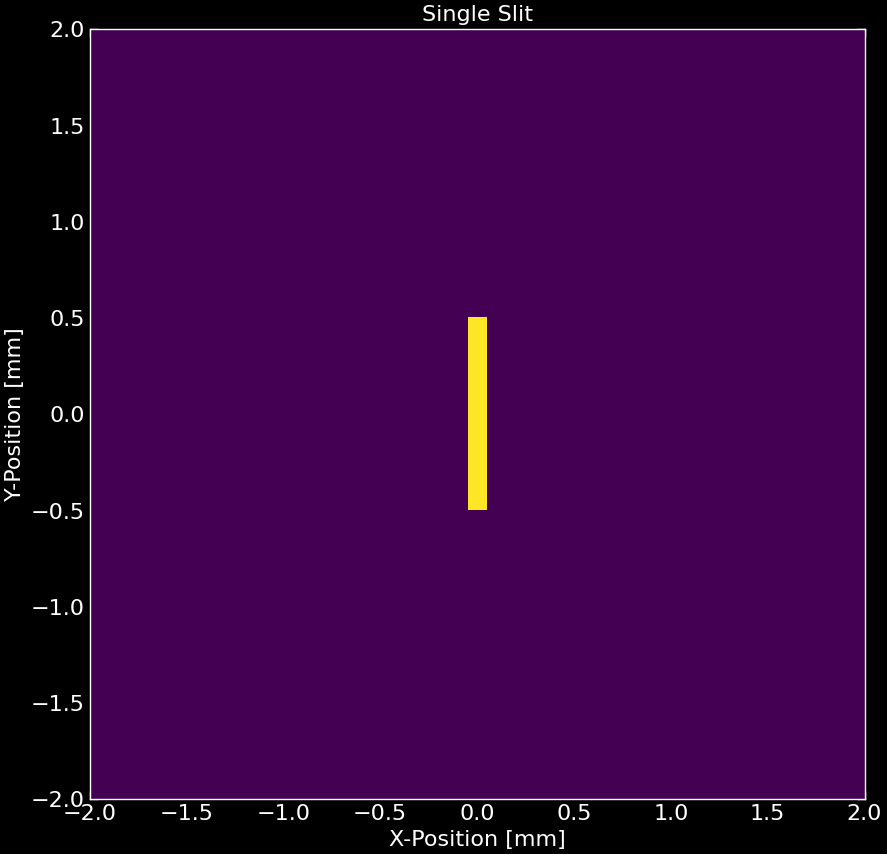

In [3]:
plt.figure(figsize = (10, 10))
plt.pcolormesh(xv, yv, U0)

plt.title('Single Slit')
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')

In [4]:
A = fft2(U0)

kx = fftfreq(len(x), np.diff(x)[0]) *  2 * np.pi
kxv, kyv = np.meshgrid(kx, kx)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10136\2895844052.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(fftshift(kxv.magnitude), fftshift(kyv.magnitude), np.abs(fftshift(A)))


(-100.0, 100.0)

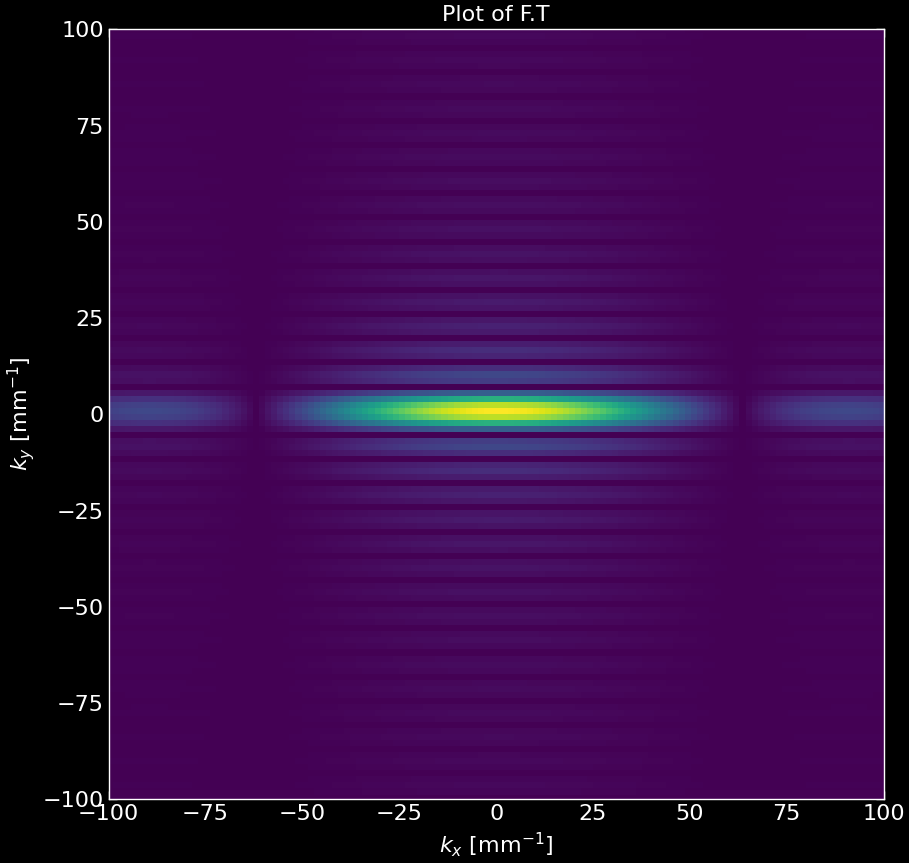

In [5]:
plt.figure(figsize = (10, 10))
plt.pcolormesh(fftshift(kxv.magnitude), fftshift(kyv.magnitude), np.abs(fftshift(A)))

plt.title('Plot of F.T')
plt.xlabel(r'$k_x$ [mm$^{-1}$]')
plt.ylabel(r'$k_y$ [mm$^{-1}$]')
plt.xlim(-100, 100)
plt.ylim(-100, 100)

In [6]:
def get_U(z, k):
    return ifft2(A * np.exp(1j * z * np.sqrt(k ** 2 - kxv ** 2 - kyv ** 2)))

k = 2 * np.pi / lam
d = 3 * u.cm

U = get_U(d, k)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\fft\_pocketfft\helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:736: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


Text(0, 0.5, '$y$ [mm]')

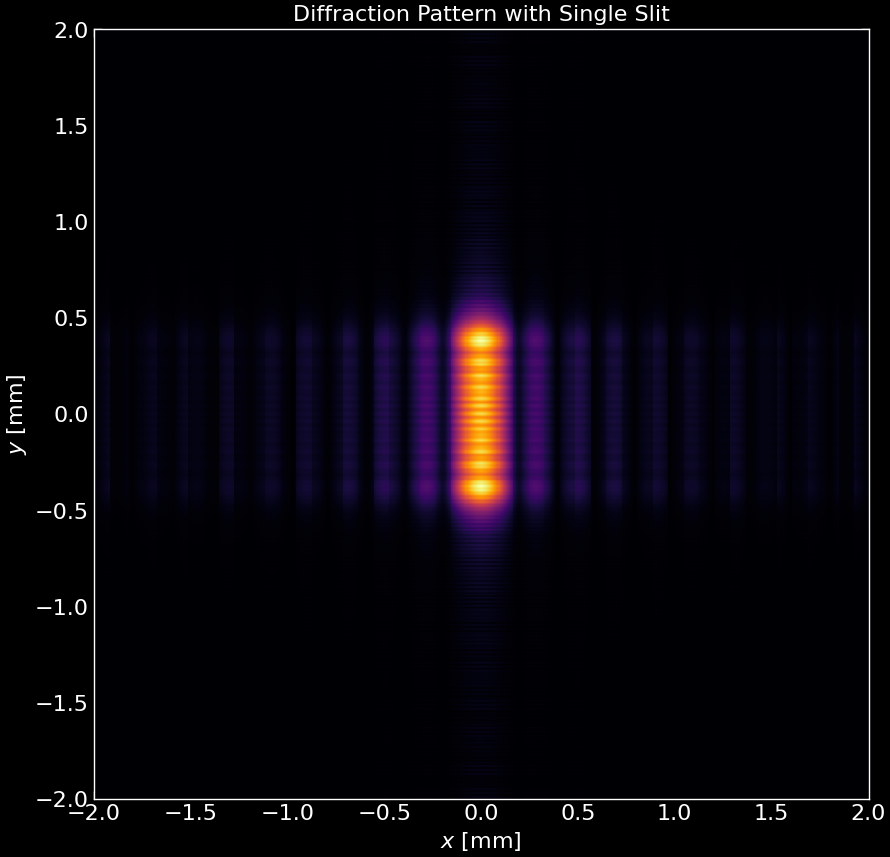

In [7]:
plt.figure(figsize = (10, 10))
plt.pcolormesh(xv, yv, np.abs(U), cmap = 'inferno', shading = 'auto')

plt.title('Diffraction Pattern with Single Slit')
plt.xlabel(r'$x$ [mm]')
plt.ylabel(r'$y$ [mm]')

For the single slit experiment, minima of intensity occur at $D\sin \theta=m \lambda$ where $D$ is the slid width and $m \in I$. Taking $$\sin \theta=\frac x{\sqrt{x^2+d^2}}$$ where
- $x$ is the horizontal distance on the screen
- $d$ is he separation between the slit and the screen.

We can now solve for the positions $x$ at minima: $$x=\frac{m \lambda d}{\sqrt{D^2-m^2 \lambda^2}}$$

In [8]:
m = np.arange(1, 5, 1)
x_min = np.sqrt(m ** 2 * lam ** 2 * d ** 2 / (D ** 2 - m ** 2 * lam ** 2)).to('mm')

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1333: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, '$u(x,y,z)$ [Sq. Root of Intensity]')

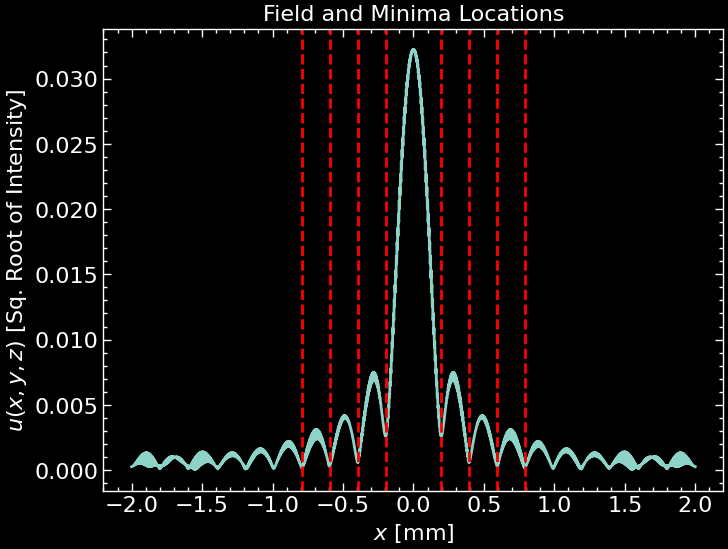

In [9]:
plt.plot(x, np.abs(U)[250])
[plt.axvline(x.magnitude, ls = '--', color = 'r',) for x in x_min]
[plt.axvline(-x.magnitude, ls = '--', color = 'r') for x in x_min]

plt.grid()
plt.title('Field and Minima Locations')
plt.xlabel(r'$x$ [mm]')
plt.ylabel(r'$u(x,y,z)$ [Sq. Root of Intensity]')

# Experiment 2: Double Slit

In [10]:
S = 0.2 * u.mm
D = 0.05 * u.mm

x = np.linspace(-4, 4, 3200) * u.mm
xv, yv = np.meshgrid(x, x)

U0 = ((np.abs(xv - S / 2) < D / 2) * (np.abs(yv) < 2 * u.mm) + (np.abs(xv + S / 2) < D / 2) * (np.abs(yv) < 2 * u.mm)).astype(float)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:736: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10136\1395882981.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xv, yv, U0)


Text(0, 0.5, 'Y-Position [mm]')

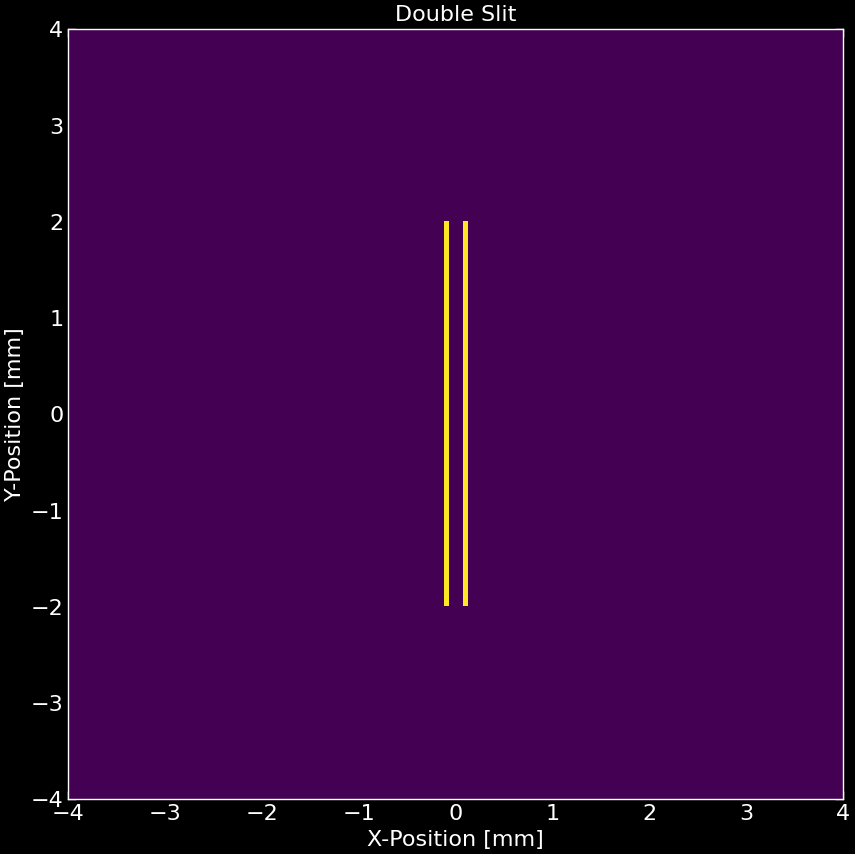

In [11]:
plt.figure(figsize = (10, 10))
plt.pcolormesh(xv, yv, U0)

plt.title('Double Slit')
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')

In [6]:
def compute_U(U0, xv, yv, lam, z):
    A = fft2(U0)

    kx = 2 * np.pi * fftfreq(len(x), np.diff(x)[0])
    kxv, kyv = np.meshgrid(kx, kx)
    k = 2 * np.pi / lam

    return ifft2(A * np.exp(1j * z * np.sqrt(k ** 2 - kxv ** 2 - kyv ** 2)))

U = compute_U(U0, xv, yv, lam, z = 5 * u.cm)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\fft\_pocketfft\helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


Text(0, 0.5, '$y$ [mm]')

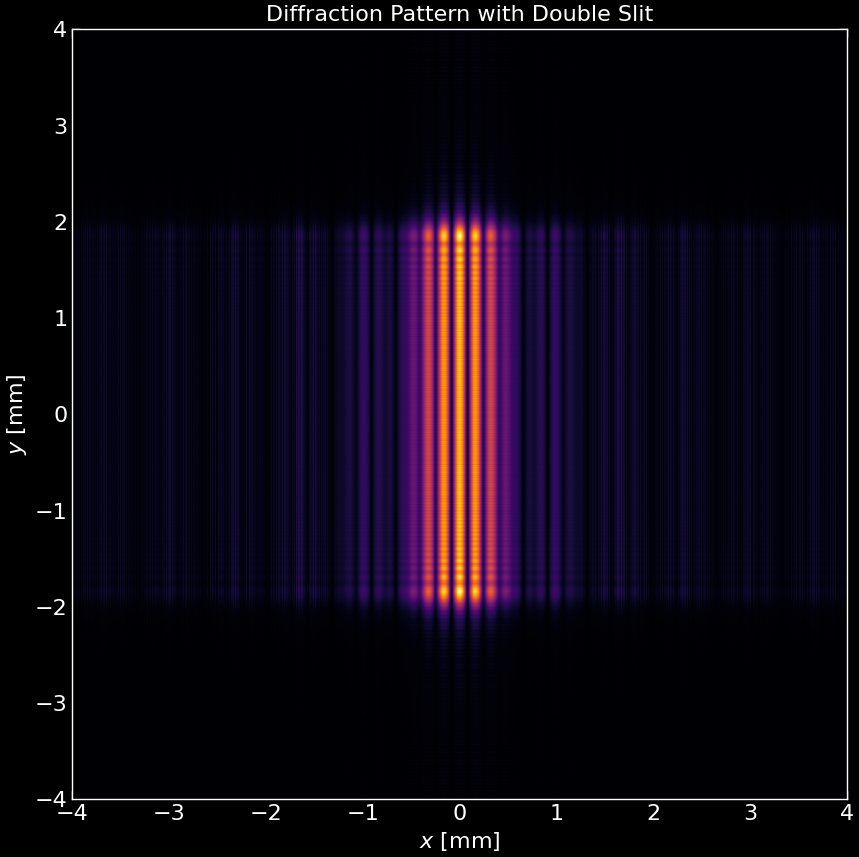

In [14]:
plt.figure(figsize = (10, 10))
plt.pcolormesh(xv, yv, np.abs(U), cmap  = 'inferno', shading = 'auto')

plt.title('Diffraction Pattern with Double Slit')
plt.xlabel(r'$x$ [mm]')
plt.ylabel(r'$y$ [mm]')

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1333: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, '$u(x,y,z)$ [Sq. Root of Intensity]')

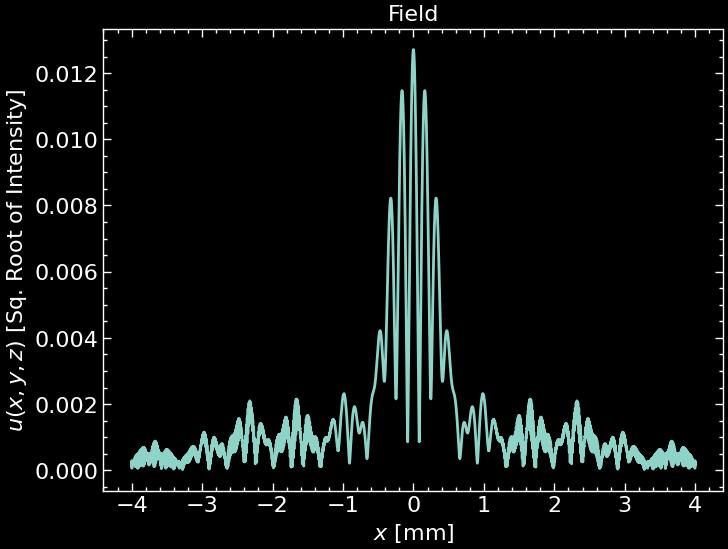

In [15]:
central_line = np.abs(U)[250]

plt.plot(x, central_line)

plt.grid()
plt.title('Field')
plt.xlabel(r'$x$ [mm]')
plt.ylabel(r'$u(x,y,z)$ [Sq. Root of Intensity]')

# Experiment 3: Circle

Let's look at the diffraction pattern of a pinhole:

In [13]:
x = np.linspace(-2, 2, 1600) * u.mm
xv, yv = np.meshgrid(x, x)

R = 0.1 * u.mm

U0 = (xv ** 2 + yv ** 2 < R ** 2).astype(float) 
U = compute_U(U0, xv, yv, lam, z = 5 * u.cm)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:736: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


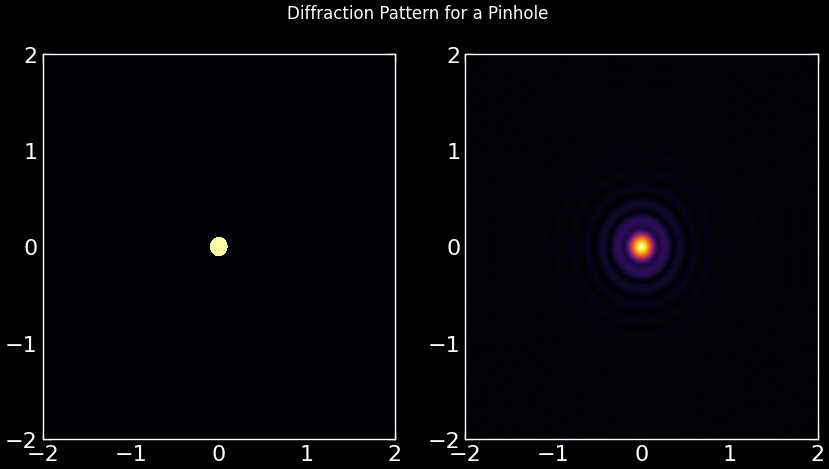

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Diffraction Pattern for a Pinhole')

ax[0].pcolormesh(xv, yv, np.abs(U0), cmap = 'inferno', shading = 'auto')
ax[1].pcolormesh(xv, yv, np.abs(U), cmap = 'inferno', shading = 'auto')

# Experiment 4: Octagon

Lets see how the diffraction pattern changes for different wavelengths going through a octagonal pinhole structure:

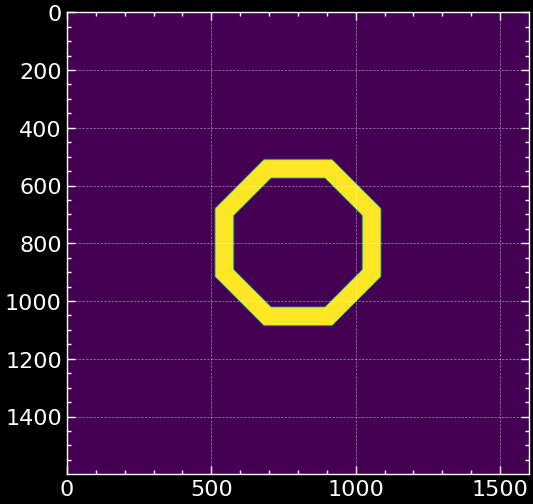

In [7]:
img = cv2.imread('..\Images\octagon.png')
img = np.pad(img, 200, mode = 'constant')
img = cv2.resize(img, dsize = (1600, 1600), interpolation = cv2.INTER_CUBIC)

U0 = np.array(img).sum(axis = 2).astype(float)
plt.imshow(U0)

In [8]:
violet = 415 * u.nm
green = 550 * u.nm 
orange = 600 * u.nm
red = 685 * u.nm

x = np.linspace(-2, 2, U0.shape[0]) * u.mm
xv, yv = np.meshgrid(x, x)

U1 = compute_U(U0, xv, yv, lam = violet, z = 6 * u.cm)
U2 = compute_U(U1, xv, yv, lam = green, z = 6 * u.cm)
U3 = compute_U(U1, xv, yv, lam = orange, z = 6 * u.cm)
U4 = compute_U(U1, xv, yv, lam = red, z = 6 * u.cm)

In [9]:
def wv_to_rgb(wavelength, gamma = 0.8):
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R, G, B)

cmaps = [LinearSegmentedColormap.from_list('custom', [(0, 0 ,0),wv_to_rgb(lam.magnitude)], N = 256) for lam in [violet, green, orange, red]]

Text(0.5, 1.0, '$\\lambda$=685 nm')

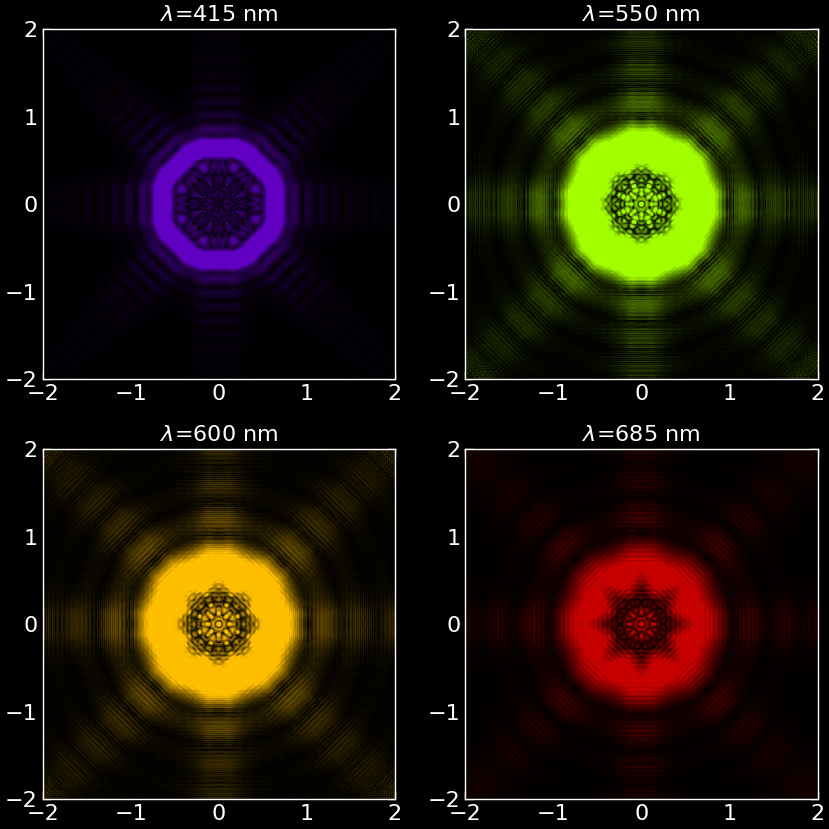

In [10]:
fig, ax = plt.subplots(2, 2, figsize = (10,10))

ax[0,0].pcolormesh(xv,yv,np.abs(U1), cmap = cmaps[0], shading = 'auto', vmax = np.max(np.abs(U1)) / 2)
ax[0,1].pcolormesh(xv,yv,np.abs(U2), cmap = cmaps[1], shading = 'auto', vmax = np.max(np.abs(U2)) / 2)
ax[1,0].pcolormesh(xv,yv,np.abs(U3), cmap = cmaps[2], shading = 'auto', vmax = np.max(np.abs(U3)) / 2)
ax[1,1].pcolormesh(xv,yv,np.abs(U4), cmap = cmaps[3], shading = 'auto', vmax = np.max(np.abs(U4)) / 2)

ax[0,0].set_title('$\lambda$={} nm'.format(violet.magnitude))
ax[0,1].set_title('$\lambda$={} nm'.format(green.magnitude))
ax[1,0].set_title('$\lambda$={} nm'.format(orange.magnitude))
ax[1,1].set_title('$\lambda$={} nm'.format(red.magnitude))

0


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\fft\_pocketfft\helper.py:98: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(x, dtype=dtype, copy=copy)


0
10
20
30


KeyboardInterrupt: 

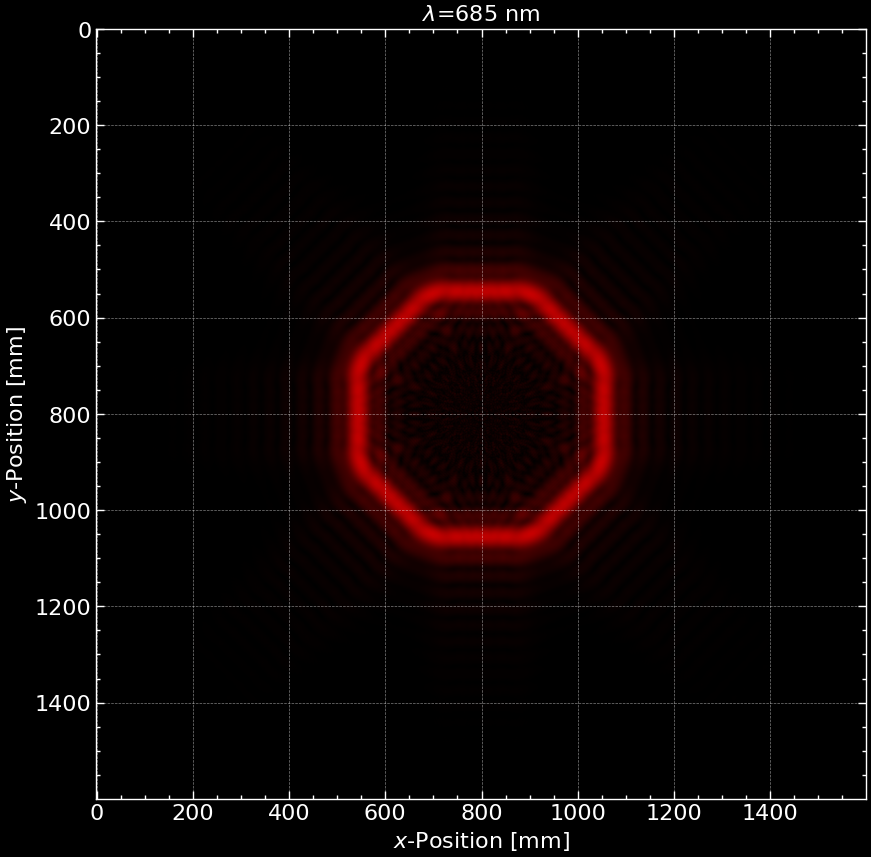

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))
ax.set_title(r'$\lambda$={} nm'.format(red.magnitude))
ax.set_xlabel(r'$x$-Position [mm]')
ax.set_ylabel(r'$y$-Position [mm]')

def animate(i):
    if i % 10 == 0: print(i)
    U = compute_U(U0, xv, yv, lam = red, z = 0.06 * i * u.cm)
    ax.imshow(np.abs(U), cmap = cmaps[3])
    
ani = animation.FuncAnimation(fig, animate, frames = 100, interval = 50)
ani.save(r'..\Outputs\diffraction.gif', writer = 'pillow', fps = 10, dpi = 100)